In [1]:
# Import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading and preprocessing the file (removing the Null values)
f_data = pd.read_csv("penguins.csv")

In [3]:
print(f_data)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [4]:
# Determine the sum of missing entries
m_sum = f_data.isnull().sum()
print("Sum of missing entries from each column:")
print(m_sum)

Sum of missing entries from each column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [5]:
# Missing value fill up in each column
f_data = f_data.fillna(f_data.mode().iloc[0])
print(f_data)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen            41.1           17.0              190.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [6]:
# Description of statistics
print(f_data.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      344.000000     344.000000         344.000000   344.000000   
mean        43.905523      17.150291         200.851744  4199.418605   
std          5.447882       1.969061          14.045266   800.197923   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.275000      15.600000         190.000000  3550.000000   
50%         44.250000      17.300000         197.000000  4025.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [7]:
# Convert features with string datatype to categorical 
species = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
island = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
sex = {'male': 0, 'female': 1}

f_data['species'] = f_data['species'].map(species)
f_data['island'] = f_data['island'].map(island)
f_data['sex'] = f_data['sex'].map(sex)

In [8]:
# Normalize non-categorical features
def normalizing(column):
    maximum_value = column.max()
    minimum_value = column.min()
    a = column - minimum_value
    b = maximum_value - minimum_value
    column = a / b
    return column

In [9]:
# Passing the features to the normalizing function 
f_data = f_data.drop(['year'], axis=1)
f_data['bill_length_mm'] = normalizing(f_data["bill_length_mm"])
f_data['bill_depth_mm'] = normalizing(f_data["bill_depth_mm"])
f_data['flipper_length_mm'] = normalizing(f_data["flipper_length_mm"])
f_data['body_mass_g'] = normalizing(f_data["body_mass_g"])

In [10]:
#Choose your attribute and target abd data matrix
X = f_data.drop('sex', axis=1).values
y = f_data['sex'].values

datasample = len(f_data)
train_data = int(datasample * 0.8)
test_data = datasample - train_data

X_train = X[:train_data]
y_train = y[:train_data]
X_test = X[train_data:]
y_test = y[train_data:]

In [11]:
# Print the shape of X_train, y_train, X_test, y_test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 6)
y_train shape: (275,)
X_test shape: (69, 6)
y_test shape: (69,)


In [19]:
# Define Logistic Regression class 
class LogitRegression():
    
    def __init__(self, learning_rate, iterations_num):
        self.learning_rate = learning_rate
        self.iterations_num = iterations_num
        
    def fit(self, X, y):
        self.N, self.d = X.shape
        self.weights = np.random.uniform(0, 1, self.d)
        self.bias = 0
        self.loss = []
        self.accuracy = []
        for i in range(self.iterations_num):
            grad_w, grad_b = self.gradient_descent(X, y)
            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b
            loss = self.cost(X, y)
            self.loss.append(loss)
            accuracy = self.evaluate(X, y)
            self.accuracy.append(accuracy)
            if i % 10000 == 0:
                print("Iteration : {}".format(i))
                print("Loss = {}".format(loss))
                print("Accuracy = {}%".format(accuracy))
                
    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))
    
    def cost(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        p = self.sigmoid(z)
        return (-1/self.N) * np.sum(y*np.log(p) + (1-y)*np.log(1-p))
    
    def gradient_descent(self, X, y):
        z = np.dot(X, self.weights) + self.bias
        p = self.sigmoid(z)
        grad_w = np.dot(X.T, (p - y)) / self.N
        grad_b = np.sum(p - y) / self.N
        return grad_w, grad_b
                 
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        y_hat_labels = [1 if pr >= 0.5 else 0 for pr in y_hat]
        return y_hat_labels
    
    def evaluate(self, X, y):
        y_predict = self.predict(X)
        accuracy = np.mean(y_predict == y) * 100
        return accuracy
    
    def picklefile_save(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump({'weights': self.weights, 'bias': self.bias}, file)
    
    def plot_loss_graph(self):
        plt.plot(self.loss)
        plt.title("Loss vs. Iterations Number")
        plt.xlabel("Number of Iteration")
        plt.ylabel("Loss Value")
        plt.show()
            

Iteration : 0
Loss = 1.05406716429418
Accuracy = 47.63636363636364%
Iteration : 10000
Loss = 0.6626937816343361
Accuracy = 61.09090909090909%
Iteration : 20000
Loss = 0.634232343147699
Accuracy = 66.9090909090909%
Iteration : 30000
Loss = 0.609513329667802
Accuracy = 72.36363636363636%
Iteration : 40000
Loss = 0.587481438294735
Accuracy = 77.0909090909091%
Iteration : 50000
Loss = 0.5677074642918594
Accuracy = 80.36363636363636%
Iteration : 60000
Loss = 0.5498956797113541
Accuracy = 82.18181818181817%
Iteration : 70000
Loss = 0.5338035470335867
Accuracy = 84.36363636363636%
Iteration : 80000
Loss = 0.5192234578281429
Accuracy = 85.0909090909091%
Iteration : 90000
Loss = 0.5059757921080623
Accuracy = 85.45454545454545%


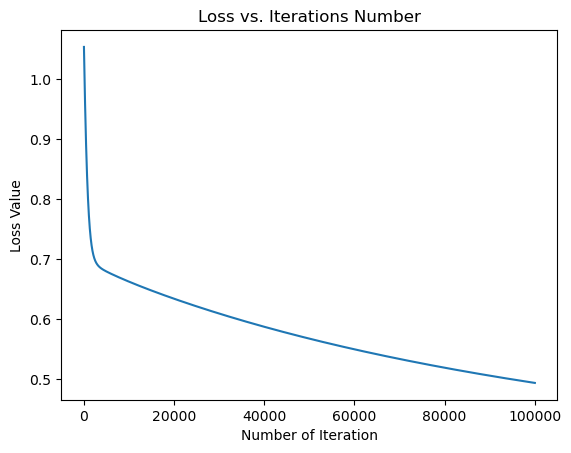

In [20]:
# Presenting the output
model = LogitRegression(learning_rate = 1e-3, iterations_num = 100000)
model.fit(X_train,y_train)
model.predict(X_train)
model.picklefile_save('Paul_Anip_logistic_regression.pkl')
model.plot_loss_graph()